Architecture of a classification model
1. Input layer shape - Same as number of features.
2. Hidden shape - Problem specific(minimum-1 and maximum-unlimited)
3. Neurons per hidden layer - Problem specific, generally 10 to 100
4. Output layer shape - 1(for binary) / 1 per class
5. Hidden activation - usually ReLU(can try linear)
6. Output activation - Sigmoid(for binary classification) / Softmax(for multiclass)
7. Loss function - Cross entropy / categorical cross entropy
8. Optimizer - SGD, Adam

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

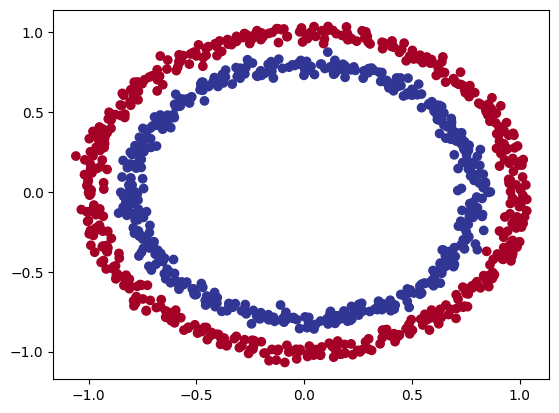

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 2.6308 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7528 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7111 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 0.6994 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.6959 - accuracy: 0.4920


In [9]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Improving the model. Adding one more layer.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Adding 3 layers now. and changing optimizer to Adam

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add an extra layer
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.1046 - accuracy: 0.4560
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5150
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4580
Epoch 11/

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5110


[0.7005494832992554, 0.5109999775886536]

In [14]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


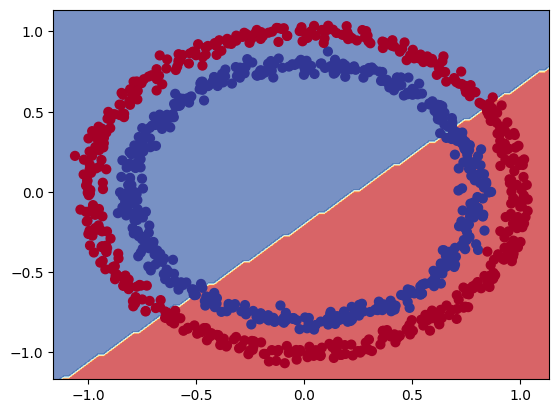

In [15]:
plot_decision_boundary(model_3, X, y)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [17]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 425.9124 - mae: 425.9124
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 295.8409 - mae: 295.8409
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 170.6491 - mae: 170.6491
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 56.1846 - mae: 56.1846
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 79.7922 - mae: 79.7922
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 84.2751 - mae: 84.2751
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 51.3665 - mae: 51.3665
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 53.3102 - mae: 53.3102
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.9537 - mae: 48.9537
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.5904 - mae: 45.5904
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


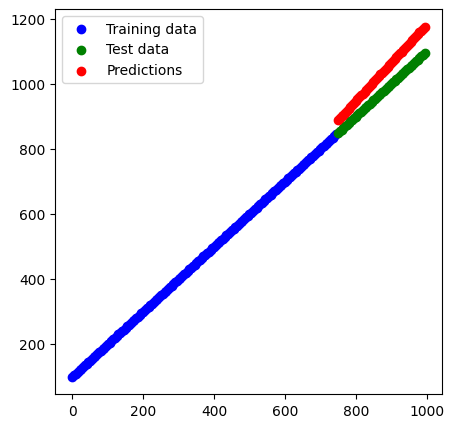

In [18]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(5,5))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### Add a activation layer to our classification model.
1. Linear
2. relu
3. sigmoid (for output layer)

In [19]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])

history=model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 1.6052 - accuracy: 0.5130
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.4850
Epoch 11/

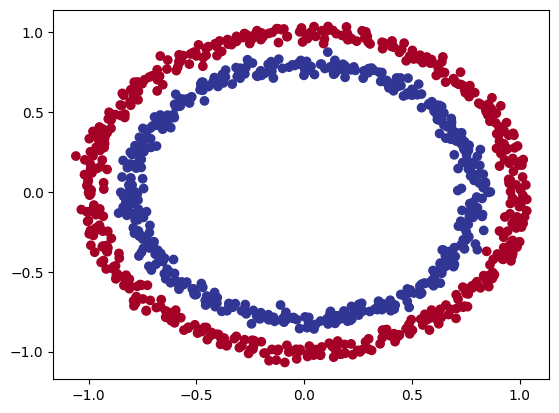

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


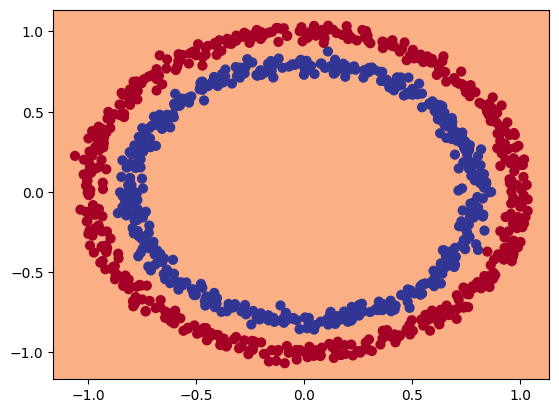

In [21]:
plot_decision_boundary(model_4, X, y)

In [22]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.9833 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5463 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4251 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3397 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2732 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2193 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1756 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1392 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1087 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.4640
Epoch 11/

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9740 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5984 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5959 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.8594 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0204 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9986 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9404 - accuracy: 0.4440
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.4690
Epoch 11/

In [24]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7370


[0.603013813495636, 0.7369999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


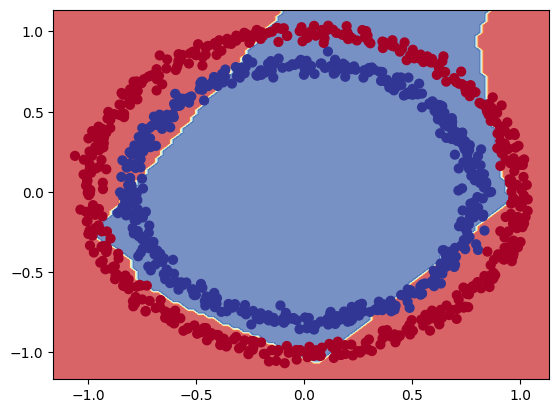

In [25]:
plot_decision_boundary(model_6, X, y)

In [26]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5200
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5450
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6420
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.5610
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.5910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6600
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7210
Epoch 11/

In [27]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9960


[0.009662734344601631, 0.9959999918937683]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


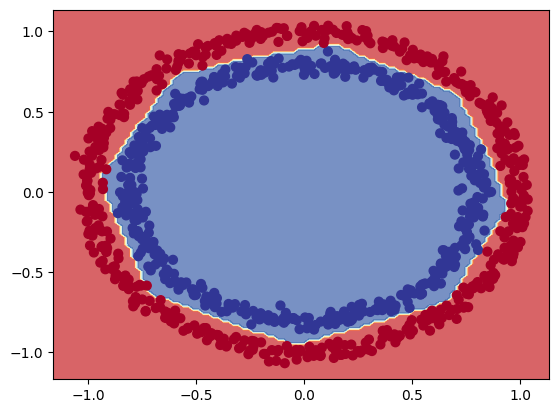

In [28]:
plot_decision_boundary(model_7, X, y)

### Activation functions

In [29]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

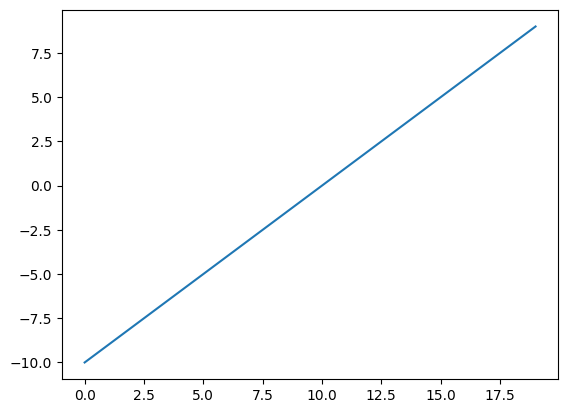

In [30]:
plt.plot(A)

#### 1. Sigmoid

In [31]:
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

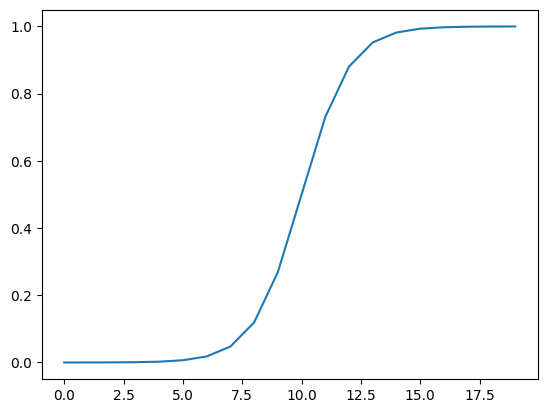

In [32]:
plt.plot(sigmoid(A));

#### 2. ReLU

In [33]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

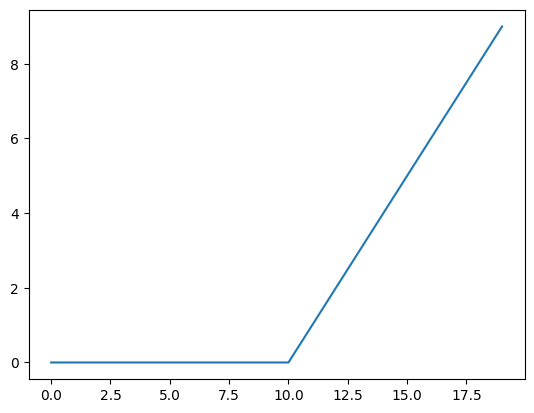

In [34]:
plt.plot(relu(A));

In [35]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Evaluating and improving classification model

In [36]:
# Splitting into train and test datasets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [46]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 5ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6826 - accuracy: 0.5550
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6725 - accuracy: 0.6087
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6612
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6825
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.7400
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.8325
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.8900
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4858 - accuracy: 0.9225
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.9588
Epoch 11/50
25/25 [

In [47]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (32, 4)                   12        
                                                                 
 dense_29 (Dense)            (32, 4)                   20        
                                                                 
 dense_30 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 1.0000
Model loss on the test set: 0.018877143040299416
Model accuracy on the test set: 100.00%


313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


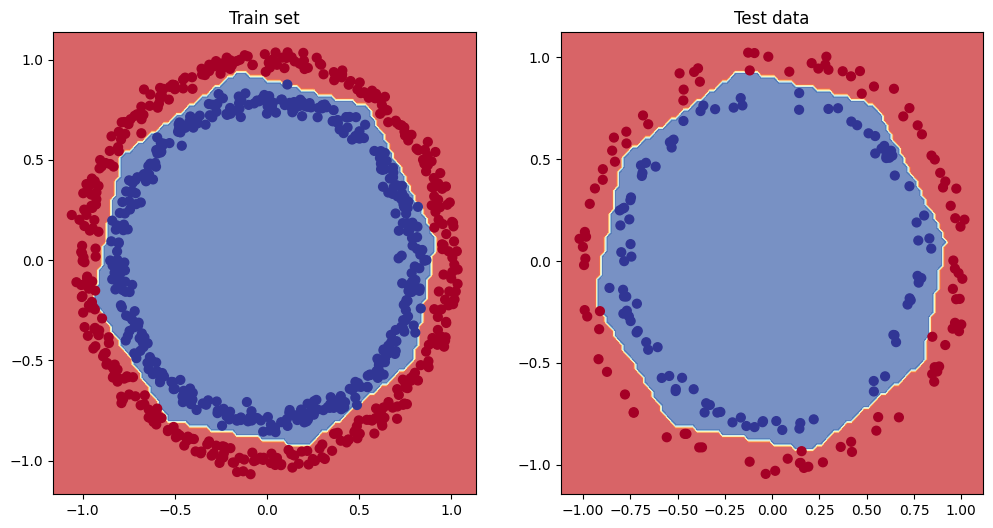

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_8, X=X_test, y=y_test)

### Plot the loss(training) curves

In [50]:
history_8.history

{'loss': [0.6934133768081665,
  0.682597279548645,
  0.6725063323974609,
  0.6594105362892151,
  0.6423827409744263,
  0.616775631904602,
  0.5848476886749268,
  0.5409713983535767,
  0.48580676317214966,
  0.42281752824783325,
  0.3530726730823517,
  0.2850380539894104,
  0.22969157993793488,
  0.19217795133590698,
  0.15816840529441833,
  0.13694171607494354,
  0.11637037992477417,
  0.1033790335059166,
  0.09160495549440384,
  0.08393935859203339,
  0.0729277953505516,
  0.06841988116502762,
  0.061847589910030365,
  0.05654764175415039,
  0.053983770310878754,
  0.0515127032995224,
  0.04718371480703354,
  0.046578701585531235,
  0.04069674387574196,
  0.041575465351343155,
  0.03749515116214752,
  0.03617468848824501,
  0.03277554363012314,
  0.03240784630179405,
  0.029675712808966637,
  0.03086763620376587,
  0.027193749323487282,
  0.028255010023713112,
  0.028752660378813744,
  0.025907186791300774,
  0.0246899351477623,
  0.024167174473404884,
  0.024936409667134285,
  0.0222

In [52]:
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.693413,0.51000
1,0.682597,0.55500
2,0.672506,0.60875
3,0.659411,0.66125
4,0.642383,0.68250
5,0.616776,0.74000
6,0.584848,0.83250
7,0.540971,0.89000
8,0.485807,0.92250
9,0.422818,0.95875


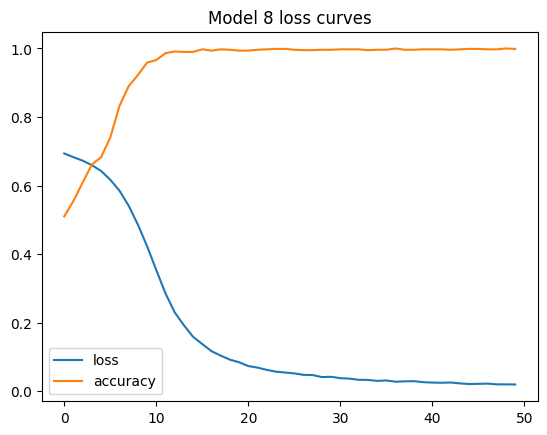

In [54]:
pd.DataFrame(history_8.history).plot()
plt.title("Model 8 loss curves");

### Finding the best learning rate
Decide the best number for the model.


In [61]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(X_train, y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

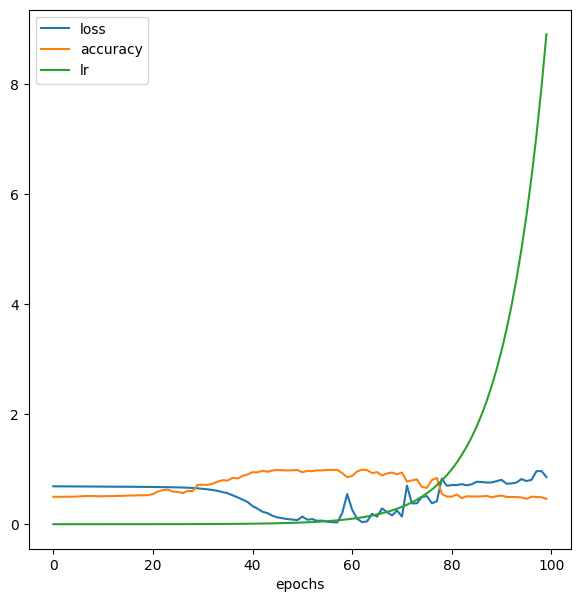

In [62]:
pd.DataFrame(history_9.history).plot(figsize=(7,7), xlabel="epochs");

In [63]:
### PLot learning rate vs. loss
lrs=1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
plt.figure()